In [ ]:
# !pip install tensorflow
# !pip install wordcloud
# !pip install pycountry
# !pip install langdetect
# !pip install prettytable

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
import itertools
from itertools import combinations
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from collections import Counter
import nltk
from nltk.corpus import stopwords, words as nltk_words
from nltk.tokenize import word_tokenize
# from wordcloud import WordCloud
import matplotlib.cm as cm
import re
from nltk.stem import WordNetLemmatizer
import heapq
from tqdm import tqdm

# import pycountry
# from langdetect import detect
# from prettytable import PrettyTable

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# LOAD DATA FILES AND COMBINE

In [ ]:
# df = pd.read_csv('D:/21301648/tweets-1.csv')
# df1 = pd.read_csv('D:/21301648/tweets-2.csv')
# df2 = pd.read_csv('D:/21301648/tweets-3.csv')
# df3 = pd.read_csv('D:/21301648/tweets-4.csv')
# df4 = pd.read_csv('D:/21301648/tweets-5.csv')
# df5 = pd.read_csv('D:/21301648/tweets-6.csv')
# df6 = pd.read_csv('D:/21301648/tweets.csv')
# comb = [df, df1, df2, df3, df4, df5, df6]
# df = pd.concat(comb)
# print(df.shape)
# df.head(5)

In [3]:
# shihab
df = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-1.csv')
df1 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-2.csv')
df2 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-3.csv')
df3 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-4.csv')
df4 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-5.csv')
df5 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-6.csv')
df6 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets.csv')

# # raiyan
# # df = pd.read_csv('/content/drive/MyDrive/data/tweets.csv')
# # df1 = pd.read_csv('/content/drive/MyDrive/data/tweets-1.csv')
# # df2 = pd.read_csv('/content/drive/MyDrive/data/tweets-2.csv')
# # df3 = pd.read_csv('/content/drive/MyDrive/data/tweets-3.csv')
# # df4 = pd.read_csv('/content/drive/MyDrive/data/tweets-4.csv')
# # df5 = pd.read_csv('/content/drive/MyDrive/data/tweets-5.csv')
# # df6 = pd.read_csv('/content/drive/MyDrive/data/tweets-6.csv')

comb = [df, df1, df2, df3, df4, df5, df6]
df = pd.concat(comb)
print(df.shape)

<ipython-input-3-9ccef2a1060f>:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-2.csv')
<ipython-input-3-9ccef2a1060f>:7: DtypeWarning: Columns (6,7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-6.csv')


(337702, 19)


In [4]:
df.head()

,Tweet Id,Tweet URL,Tweet Posted Time,Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,User Id,Name,Username,User Bio,Verified or Non-Verified,Profile URL,User Followers,User Following,User Account Creation Date
0,"""1570828309159907328""",https://twitter.com/syfalzawy9/status/15708283...,16 Sep 2022 17:33:48,"""#Web3\n#Metaverse\n#Bitcoin\n#HZM_COIN\n#Nemo...",Tweet,"""Twitter for Android""",0,0,"""""",qht,"""1524437405905956865""","""سيف العزاوي""",syfalzawy9,"""HZM coin""",Non-Verified,https://twitter.com/syfalzawy9,48.0,222.0,11-May-2022 17:13:08
1,"""1570828309495427078""",https://twitter.com/dusaki848/status/157082830...,16 Sep 2022 17:33:48,"""ABBY2021 found #bitcoin in a Blue vault at th...",Tweet,"""Twitter for Android""",0,0,"""""",English,"""416430263""","""Steve pinson""",dusaki848,"""""",Non-Verified,https://twitter.com/dusaki848,26.0,13.0,19-Nov-2011 17:38:31
2,"""1570828310015508481""",https://twitter.com/RanjitP81573700/status/157...,16 Sep 2022 17:33:48,"""ADSCOIN THE PRIDE OF INDIA. \nWE HAVE..\nADSC...",ReTweet,"""Twitter for Android""",0,0,"""""",English,"""1568999999685656582""","""Ranjit Pawara""",RanjitP81573700,"""""",Non-Verified,https://twitter.com/RanjitP81573700,73.0,401.0,11-Sep-2022 16:29:19
3,"""1570828310715965440""",https://twitter.com/ImranaMuntasir/status/1570...,16 Sep 2022 17:33:48,"""💥BREAKING: First solar-power Bitcoin mining p...",ReTweet,"""Twitter for Android""",0,0,"""""",English,"""1322188513543147521""","""Imran Muntasir""",ImranaMuntasir,"""Computer Scientist and A\nHodler of $RSR $MAH...",Non-Verified,https://twitter.com/ImranaMuntasir,336.0,2951.0,30-Oct-2020 14:48:17
4,"""1570828311596761089""",https://twitter.com/dulal6654/status/157082831...,16 Sep 2022 17:33:48,"""Good luck Good Project\n\n@hahshhzg\n@mehwish...",Tweet,"""Twitter Web App""",0,0,"""""",English,"""1569606774503907329""","""dulal ahamed""",dulal6654,"""13-09-2022""",Non-Verified,https://twitter.com/dulal6654,18.0,53.0,13-Sep-2022 08:40:04


In [5]:
# Define the hashtags to search for
hashtags = ['#bitcoin', '#btc']

# Filter the DataFrame to keep only rows where 'Tweet Content' contains any of the hashtags
df = df[df['Tweet Content'].str.contains('|'.join(hashtags), case=False, na=False)]

print(df.shape)

(311424, 19)


# PREPROCESSING

In [6]:
# Convert 'Tweet Content' column to lowercase
df['Tweet Content'] = df['Tweet Content'].str.lower()

# Remove URLs from text
def remove_urls(text):
    return re.sub(r'http\S+', '', text)
df['Tweet Content'] = df['Tweet Content'].apply(remove_urls)

#remove other language tweets
df = df.loc[df['Tweet Language']=="English"]
print(df.shape)

# remove data with NaN values in these columns and convert followers and following column to integers

df.dropna(subset=['User Followers', 'User Following', "Retweets Received"], inplace=True)

df['User Followers'] = df['User Followers'].astype(int)
df['User Following'] = df['User Following'].astype(int)
df['Retweets Received'] = df['Retweets Received'].astype(int)

#formatting date time (DD-MM-YY)(HH-MM-SS)

df['datetime'] = pd.to_datetime(df['Tweet Posted Time'], format='%d %b %Y %H:%M:%S')
df['date'] = df['datetime'].dt.date
print(df['date'].unique())

# to remove retweets we can remove duplicates in the "Tweet Content" feature

# print(df.nunique())
df.drop_duplicates(subset=['Tweet Id'], keep='first', inplace=True)
print(df.shape)

# Creating a column containing just the hashtags

pattern = r'#\w+'

# Extract hashtags from each tweet and store them in a new column
df['Hashtags'] = df['Tweet Content'].apply(lambda x: re.findall(pattern, x))



(238063, 19)


<ipython-input-6-3d94d75f461a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['User Followers', 'User Following', "Retweets Received"], inplace=True)
<ipython-input-6-3d94d75f461a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User Followers'] = df['User Followers'].astype(int)
<ipython-input-6-3d94d75f461a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

[datetime.date(2022, 9, 16) datetime.date(2022, 9, 15)
 datetime.date(2022, 9, 17)]
(238047, 21)


In [7]:
# Hashtag Lemmatization and keeping just the first instance of the hashtag

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize hashtags in tweet content
def lemmatize_hashtags(tweet):
    # Define regular expression pattern to find hashtags
    hashtag_pattern = r'#(\w+)'
    # Find all hashtags in the tweet content
    hashtags = re.findall(hashtag_pattern, tweet)
    # Iterate over hashtags
    for hashtag in hashtags:
        # Lemmatize the word
        lemmatized_hashtag = lemmatizer.lemmatize(hashtag, pos='a')
        # Replace the hashtag with lemmatized word
        tweet = tweet.replace(f'#{hashtag}', f'#{lemmatized_hashtag}')
    return tweet

# Apply the function to the "Tweet Content" column
df['Tweet Content'] = df['Tweet Content'].apply(lemmatize_hashtags)



In [ ]:
print(df.columns)

Index(['Tweet Id', 'Tweet URL', 'Tweet Posted Time', 'Tweet Content',
       'Tweet Type', 'Client', 'Retweets Received', 'Likes Received',
       'Tweet Location', 'Tweet Language', 'User  Id', 'Name', 'Username',
       'User Bio', 'Verified or Non-Verified', 'Profile URL', 'User Followers',
       'User Following', 'User Account Creation Date', 'datetime', 'date',
       'Hashtags'],
      dtype='object')


## Community detection grapgh
here each tweet is a node (node x), then if each retweet (user who retweeted) of that tweet is node 1, 2, 3 then there will be edges from node x to node 1, 2,3

# Why cluster coeff is zero
As each retweet is the neibours of the main tweet, when someone for example retweets node 1, it is actually retweeting the main tweeet node x. so there is no edge between the neighbours.


**Finalize**

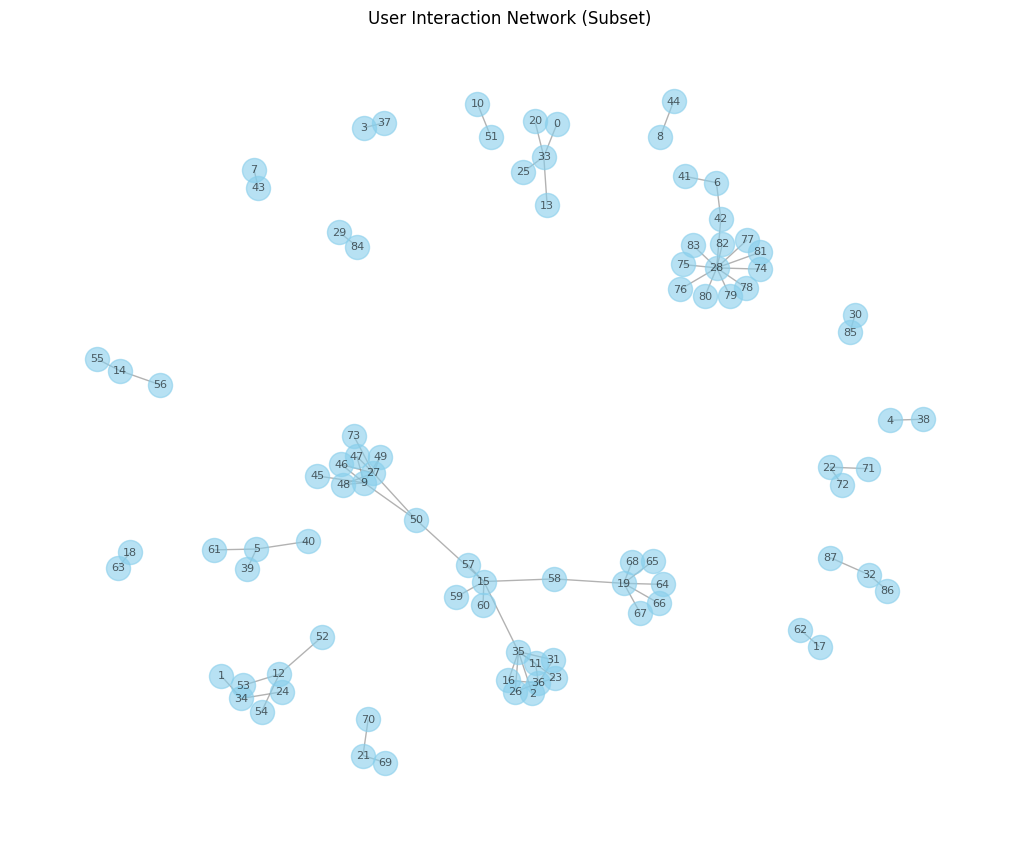

In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Set a random seed
# np.random.seed(42)


# subset_fraction = 0.0005
# subset_df = df.sample(frac=subset_fraction)
subset_df = df
# Create an empty graph
G = nx.Graph()

# Add nodes (usernames) to the graph
G.add_nodes_from(subset_df['Username'])

# Loop through each row in the subset DataFrame
for index, row in subset_df.iterrows():
    # Extract the source user (the user who posted the tweet)
    source_user = row['Username']

    # Extract the tweet content
    tweet_content = row['Tweet Content']

    # Check if the tweet is a retweet by looking for mentions in the tweet content
    retweet_users = [mention.strip('@') for mention in tweet_content.split() if '@' in mention]

    # Add edges between the source user and retweet users
    for retweet_user in retweet_users:
        if source_user != retweet_user:
            G.add_edge(source_user, retweet_user)

isolated_nodes = [n for n in G.nodes if G.degree(n) == 0]
G.remove_nodes_from(isolated_nodes)

# Use a spring layout for visualization
spring_pos = nx.spring_layout(G, k=0.15)

# Draw the graph with edges
plt.figure(figsize=(10, 8))
node_labels = {node: str(i) for i, node in enumerate(G.nodes)}
nx.draw(G, spring_pos, node_size=300, node_color='skyblue', edge_color='gray', with_labels=True, labels=node_labels, font_size=8, alpha=0.6)

plt.title('User Interaction Network (Subset)')
plt.show()

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


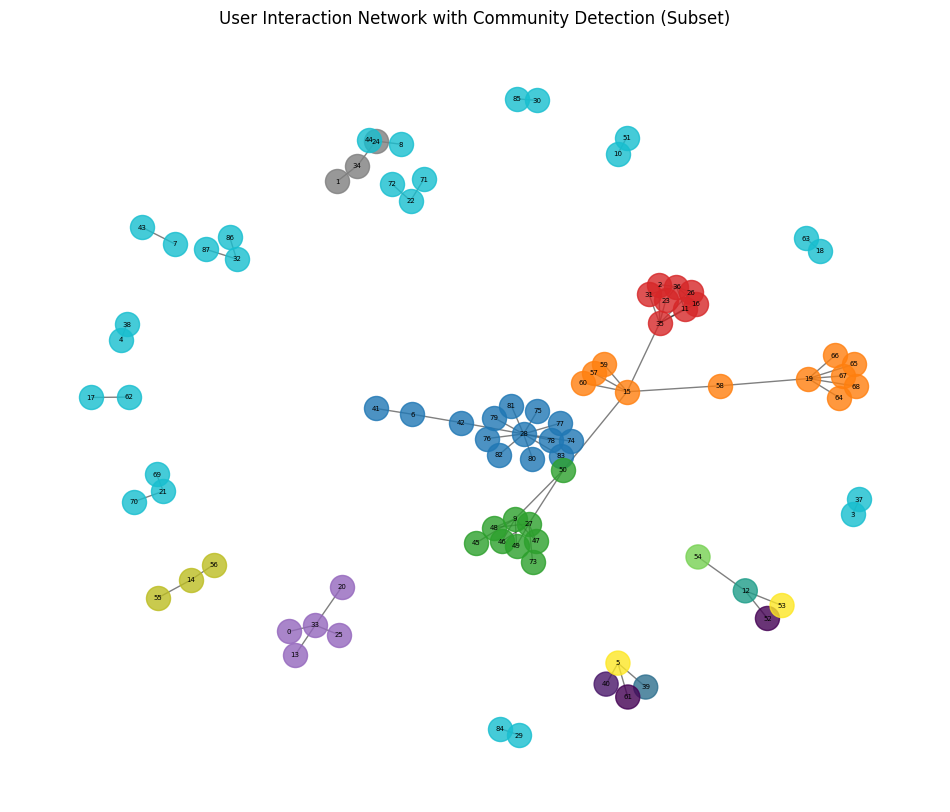

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import numpy as np

# Set a random seed


# Create an empty graph
G = nx.Graph()

# Add nodes (usernames) to the graph
G.add_nodes_from(subset_df['Username'])

# Loop through each row in the subset DataFrame
for index, row in subset_df.iterrows():
    # Extract the source user (the user who posted the tweet)
    source_user = row['Username']

    # Extract the tweet content
    tweet_content = row['Tweet Content']

    # Check if the tweet is a retweet by looking for mentions in the tweet content
    retweet_users = [mention.strip('@') for mention in tweet_content.split() if '@' in mention]

    # Add edges between the source user and retweet users
    for retweet_user in retweet_users:
        if source_user != retweet_user:
            G.add_edge(source_user, retweet_user)

isolated_nodes = [n for n in G.nodes if G.degree(n) == 0]
G.remove_nodes_from(isolated_nodes)

# Detect communities using the greedy modularity approach
communities = list(greedy_modularity_communities(G))

# Visualize the network with community detection
plt.figure(figsize=(12, 10))

# Position nodes using the spring layout with a fixed random seed
layout = nx.spring_layout(G, k=0.15)

# Draw nodes with different colors for each community
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, layout, nodelist=list(community), node_color=plt.cm.tab10(i), node_size=300, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, layout, edge_color='black', alpha=0.5)

# Add node labels
# node_labels = {node: str(i+1) for i, node in enumerate(G.nodes)}
nx.draw_networkx_labels(G, layout, labels=node_labels, font_size=5)

plt.title('User Interaction Network with Community Detection (Subset)')
plt.axis('off')
plt.show()

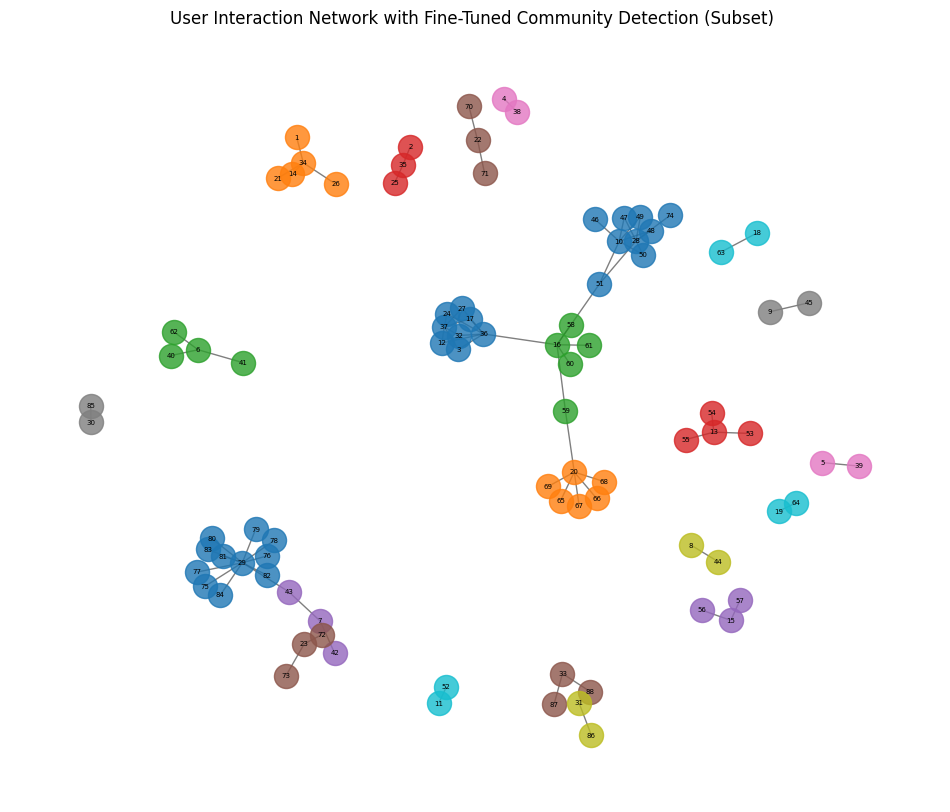

Community Sizes: [11, 9, 8, 6, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Community Densities: [0.18181818181818182, 0.3333333333333333, 0.42857142857142855, 0.3333333333333333, 0.4, 0.4, 0.5, 0.5, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [33]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import numpy as np

# Set a random seed


# Create an empty graph
G = nx.Graph()

# Add nodes (usernames) to the graph
G.add_nodes_from(subset_df['Username'])

# Loop through each row in the subset DataFrame
for index, row in subset_df.iterrows():
    # Extract the source user (the user who posted the tweet)
    source_user = row['Username']

    # Extract the tweet content
    tweet_content = row['Tweet Content']

    # Check if the tweet is a retweet by looking for mentions in the tweet content
    retweet_users = [mention.strip('@') for mention in tweet_content.split() if '@' in mention]

    # Add edges between the source user and retweet users
    for retweet_user in retweet_users:
        if source_user != retweet_user:
            G.add_edge(source_user, retweet_user)

isolated_nodes = [n for n in G.nodes if G.degree(n) == 0]
G.remove_nodes_from(isolated_nodes)

# Detect communities using the greedy modularity approach with fine-tuning
# Adjust the parameters 'resolution'- A higher resolution value favors smaller communities, while a lower resolution value favors larger communities
resolution = 2


communities = list(greedy_modularity_communities(G, resolution=resolution))

# Visualize the network with community detection
plt.figure(figsize=(12, 10))

# Position nodes using the spring layout with a fixed random seed
layout = nx.spring_layout(G, k=0.15, seed=42)

# Define a colormap for different communities
colors = plt.cm.tab10(np.linspace(0, 1, len(communities)))

# Draw nodes with different colors for each community
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, layout, nodelist=list(community), node_color=[colors[i]], node_size=300, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, layout, edge_color='black', alpha=0.5)

# Add node labels
node_labels = {node: str(i+1) for i, node in enumerate(G.nodes)}
nx.draw_networkx_labels(G, layout, labels=node_labels, font_size=5)

plt.title('User Interaction Network with Fine-Tuned Community Detection (Subset) ')
plt.axis('off')
plt.show()

# Print community sizes
community_sizes = [len(community) for community in communities]
print("Community Sizes:", community_sizes)

# Print community densities
community_densities = [nx.density(G.subgraph(community)) for community in communities]
print("Community Densities:", community_densities)

In [35]:
#OLD

import networkx as nx
import numpy as np
import pandas as pd

# Assume communities is a list of lists where each inner list represents a community
# communities = [...]

# Calculate community sizes
community_sizes = [len(community) for community in communities]

# Calculate community densities
community_densities = []
for community in communities:
    subgraph = G.subgraph(community)
    density = nx.density(subgraph)
    community_densities.append(density)

# Calculate community centralities (mean centrality for each community)
community_centralities = []
for community in communities:
    subgraph = G.subgraph(community)
    centralities = nx.degree_centrality(subgraph)
    mean_centrality = np.mean(list(centralities.values()))
    community_centralities.append(mean_centrality)

# Calculate community cohesion (mean clustering coefficient for each community)
community_cohesion = []
for community in communities:
    subgraph = G.subgraph(community)
    clustering_coeff = nx.clustering(subgraph)
    mean_clustering_coeff = np.mean(list(clustering_coeff.values()))
    community_cohesion.append(mean_clustering_coeff)

# Calculate community similarity (only necessary if you need pairwise comparisons, otherwise can be skipped)
# Not including similarity in the table as it involves pairwise comparison
community_similarity = []
for i in range(len(communities)):
    for j in range(i+1, len(communities)):
        community_i = communities[i]
        community_j = communities[j]
        similarity = len(set(community_i) & set(community_j)) / len(set(community_i) | set(community_j))
        community_similarity.append(similarity)

# Create a DataFrame to display the results
data = {
    'Community': range(1, len(communities) + 1),
    'Size': community_sizes,
    'Density': community_densities,
    'Mean Centrality': community_centralities,
    'Mean Clustering Coefficient': community_cohesion
}

df = pd.DataFrame(data)
print(df)


    Community  Size   Density  Mean Centrality  Mean Clustering Coefficient
0           1    11  0.181818         0.181818                          0.0
1           2     9  0.333333         0.333333                          0.0
2           3     8  0.428571         0.428571                          0.0
3           4     6  0.333333         0.333333                          0.0
4           5     5  0.400000         0.400000                          0.0
5           6     5  0.400000         0.400000                          0.0
6           7     4  0.500000         0.500000                          0.0
7           8     4  0.500000         0.500000                          0.0
8           9     3  0.666667         0.666667                          0.0
9          10     3  0.666667         0.666667                          0.0
10         11     3  0.666667         0.666667                          0.0
11         12     3  0.666667         0.666667                          0.0
12         1

In [40]:
import networkx as nx
import numpy as np
import pandas as pd

# Assume communities is a list of lists where each inner list represents a community
# communities = [...]

# Calculate community sizes
community_sizes = [len(community) for community in communities]

# Calculate community densities
community_densities = []
for community in communities:
    subgraph = G.subgraph(community)
    density = nx.density(subgraph)
    community_densities.append(density)

# Calculate community centralities (mean centrality for each community)
community_centralities = []
for community in communities:
    subgraph = G.subgraph(community)
    centralities = nx.degree_centrality(subgraph)
    mean_centrality = np.mean(list(centralities.values()))
    community_centralities.append(mean_centrality)

# Calculate community cohesion (mean clustering coefficient for each community)
community_cohesion = []
for community in communities:
    subgraph = G.subgraph(community)
    clustering_coeff = nx.clustering(subgraph)
    mean_clustering_coeff = np.mean(list(clustering_coeff.values()))
    community_cohesion.append(mean_clustering_coeff)

# Create a DataFrame to display the results
data = {
    'Community': range(1, len(communities) + 1),
    'Size': community_sizes,
    'Density': community_densities,
    'Mean Centrality': community_centralities,
    'Mean Clustering Coefficient': community_cohesion
}

df = pd.DataFrame(data)

# Sort the DataFrame by community size in descending order
df_sorted = df.sort_values(by='Size', ascending=False)

# Select the top 5, mid 5, and smallest 5 communities
top_5_df = df_sorted.head(5)
mid_5_start = len(df_sorted) // 2 - 2
mid_5_df = df_sorted.iloc[mid_5_start:mid_5_start + 5]
bottom_5_df = df_sorted.tail(5)

# Print the results
print("Top 5 Biggest Communities:")
print(top_5_df.to_string(index=False))
print("\nMid-sized 5 Communities:")
print(mid_5_df.to_string(index=False))
print("\nSmallest 5 Communities:")
print(bottom_5_df.to_string(index=False))


Top 5 Biggest Communities:
 Community  Size  Density  Mean Centrality  Mean Clustering Coefficient
         1    11 0.181818         0.181818                          0.0
         2     9 0.333333         0.333333                          0.0
         3     8 0.428571         0.428571                          0.0
         4     6 0.333333         0.333333                          0.0
         5     5 0.400000         0.400000                          0.0

Mid-sized 5 Communities:
 Community  Size  Density  Mean Centrality  Mean Clustering Coefficient
        13     3 0.666667         0.666667                          0.0
        12     3 0.666667         0.666667                          0.0
        11     3 0.666667         0.666667                          0.0
        10     3 0.666667         0.666667                          0.0
         9     3 0.666667         0.666667                          0.0

Smallest 5 Communities:
 Community  Size  Density  Mean Centrality  Mean Clusterin

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Find the connected components
connected_components = list(nx.connected_components(G))

# Sort the components by size (number of nodes) in descending order
sorted_components = sorted(connected_components, key=len, reverse=True)

# Select the largest 10 components
largest_components = sorted_components[:10]

# Initialize a list to store the properties of each component
components_data = []

# Loop through each of the largest components
for i, component in enumerate(largest_components):
    component_graph = G.subgraph(component)

    num_nodes_component = len(component_graph.nodes())
    num_edges_component = len(component_graph.edges())
    clustering_coefficient = nx.average_clustering(component_graph)
    if num_nodes_component > 1:
        average_path_length = nx.average_shortest_path_length(component_graph)
    else:
        average_path_length = float('inf')  # Only one node means no path
    average_degree = sum(dict(component_graph.degree()).values()) / num_nodes_component
    degree_distribution = [list(dict(component_graph.degree()).values()).count(i) / float(num_nodes_component) for i in range(max(dict(component_graph.degree()).values()) + 1)]

    # Append the component properties to the list
    components_data.append({
        'Component': f'Component {i + 1}',
        'Number of Nodes': num_nodes_component,
        'Number of Edges': num_edges_component,
        'Clustering Coefficient': clustering_coefficient,
        'Average Path Length': average_path_length,
        'Average Degree': average_degree,

    })

# Create a DataFrame from the components data
components_df = pd.DataFrame(components_data)

# Display the DataFrame in a pretty table
print(components_df.to_string(index=False))

# Optionally, use a Jupyter notebook or a similar environment to display as an HTML table
display(components_df.style.set_caption("Top 10 Largest Components"))


   Component  Number of Nodes  Number of Edges  Clustering Coefficient  Average Path Length  Average Degree
 Component 1               21               23                     0.0             3.657143        2.190476
 Component 2                8                7                     0.0             2.214286        1.750000
 Component 3                8                7                     0.0             2.392857        1.750000
 Component 4                7                6                     0.0             1.714286        1.714286
 Component 5                6                6                     0.0             1.933333        2.000000
 Component 6                6                5                     0.0             1.666667        1.666667
 Component 7                5                6                     0.0             1.400000        2.400000
 Component 8                5                4                     0.0             1.600000        1.600000
 Component 9                

,Component,Number of Nodes,Number of Edges,Clustering Coefficient,Average Path Length,Average Degree
0,Component 1,21,23,0.000000,3.657143,2.190476
1,Component 2,8,7,0.000000,2.214286,1.750000
2,Component 3,8,7,0.000000,2.392857,1.750000
3,Component 4,7,6,0.000000,1.714286,1.714286
4,Component 5,6,6,0.000000,1.933333,2.000000
5,Component 6,6,5,0.000000,1.666667,1.666667
6,Component 7,5,6,0.000000,1.400000,2.400000
7,Component 8,5,4,0.000000,1.600000,1.600000
8,Component 9,4,3,0.000000,1.500000,1.500000
9,Component 10,4,3,0.000000,1.500000,1.500000


**FULL DATASET**

In [36]:
import networkx as nx
import numpy as np
import pandas as pd

# Assuming the 'communities' variable is already defined
# communities = [...]

# Calculate community sizes
community_sizes = [len(community) for community in communities]

# Calculate various properties for each community
community_properties = []

for community in communities:
    subgraph = G.subgraph(community)
    density = nx.density(subgraph)
    num_nodes = subgraph.number_of_nodes()
    num_edges = subgraph.number_of_edges()
    clustering_coeff = nx.average_clustering(subgraph)

    if num_nodes > 1:
        avg_path_length = nx.average_shortest_path_length(subgraph)
    else:
        avg_path_length = 0  # Path length is zero if the community has only one node

    avg_degree = 2 * num_edges / num_nodes
    centralities = nx.degree_centrality(subgraph)
    mean_centrality = np.mean(list(centralities.values()))
    cohesion = np.mean(list(nx.clustering(subgraph).values()))

    community_properties.append({
        'Size': num_nodes,
        'Density': density,
        'Number of Nodes': num_nodes,
        'Number of Edges': num_edges,
        'Average Path Length': avg_path_length,
        'Average Degree': avg_degree,
        'Mean Centrality': mean_centrality,
        'Cohesion': cohesion
    })

# Sort communities by size
sorted_indices = np.argsort(community_sizes)[::-1]

# Get top 5 biggest communities
top_5_biggest_indices = sorted_indices[:5]
top_5_biggest = [community_properties[i] for i in top_5_biggest_indices]

# Get middle 5 communities
mid_5_indices = sorted_indices[len(sorted_indices)//2 - 2:len(sorted_indices)//2 + 3]
mid_5 = [community_properties[i] for i in mid_5_indices]

# Get smallest 5 communities
bottom_5_indices = sorted_indices[-5:]
bottom_5 = [community_properties[i] for i in bottom_5_indices]

# Create DataFrames to display the results
df_top_5_biggest = pd.DataFrame(top_5_biggest, index=[i+1 for i in top_5_biggest_indices])
df_mid_5 = pd.DataFrame(mid_5, index=[i+1 for i in mid_5_indices])
df_bottom_5 = pd.DataFrame(bottom_5, index=[i+1 for i in bottom_5_indices])

print("Top 5 Biggest Communities:")
print(df_top_5_biggest.to_string(index=True))
print("\nMid-sized 5 Communities:")
print(df_mid_5.to_string(index=True))
print("\nSmallest 5 Communities:")
print(df_bottom_5.to_string(index=True))


Top 5 Biggest Communities:
   Size   Density  Number of Nodes  Number of Edges  Average Path Length  Average Degree  Mean Centrality  Cohesion
1    11  0.181818               11               10             1.818182        1.818182         0.181818       0.0
2     9  0.333333                9               12             1.777778        2.666667         0.333333       0.0
3     8  0.428571                8               12             1.571429        3.000000         0.428571       0.0
4     6  0.333333                6                5             1.666667        1.666667         0.333333       0.0
5     5  0.400000                5                4             1.600000        1.600000         0.400000       0.0

Mid-sized 5 Communities:
    Size   Density  Number of Nodes  Number of Edges  Average Path Length  Average Degree  Mean Centrality  Cohesion
9      3  0.666667                3                2             1.333333        1.333333         0.666667       0.0
10     3  0.66666

In [39]:
import networkx as nx
import numpy as np
import pandas as pd

# Assuming the 'communities' variable is already defined
# communities = [...]

# Calculate community sizes
community_sizes = [len(community) for community in communities]

# Sort communities by size
sorted_indices = np.argsort(community_sizes)[::-1]

# Define a function to create DataFrame for top users in selected communities
def create_top_users_df(indices, label):
    columns = ['Community', 'Community Size', 'Top User', 'Degree Centrality']
    df = pd.DataFrame(columns=columns)

    for i in indices:
        community = communities[i]
        subgraph = G.subgraph(community)

        # Calculate degree centrality for the community
        degree_centrality = nx.degree_centrality(subgraph)

        # Find the top 10 users with the highest traffic
        top_users_traffic = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

        # Create a temporary DataFrame for the current community
        top_users = [user for user, _ in top_users_traffic]
        centralities = [centrality for _, centrality in top_users_traffic]
        num_users = len(top_users)
        community_size = len(community)
        temp_df = pd.DataFrame({
            'Community': [f'{label}-{i+1}'] * num_users,
            'Community Size': [community_size] * num_users,
            'Top User': top_users,
            'Degree Centrality': centralities
        })

        # Concatenate the temporary DataFrame with the main DataFrame
        df = pd.concat([df, temp_df], ignore_index=True)

    return df

# Get top 5 biggest communities
top_5_biggest_indices = sorted_indices[:5]
df_top_5_biggest = create_top_users_df(top_5_biggest_indices, 'Top 5 Biggest')

# Get middle 5 communities
mid_5_indices = sorted_indices[len(sorted_indices)//2 - 2:len(sorted_indices)//2 + 3]
df_mid_5 = create_top_users_df(mid_5_indices, 'Mid 5')

# Get smallest 5 communities
bottom_5_indices = sorted_indices[-5:]
df_bottom_5 = create_top_users_df(bottom_5_indices, 'Bottom 5')

print("Top 5 Biggest Communities:")
print(df_top_5_biggest.to_string(index=False))
print("\nMid-sized 5 Communities:")
print(df_mid_5.to_string(index=False))
print("\nSmallest 5 Communities:")
print(df_bottom_5.to_string(index=False))


Top 5 Biggest Communities:
      Community Community Size          Top User  Degree Centrality
Top 5 Biggest-1             11   PitbullishToken           1.000000
Top 5 Biggest-1             11        br1pitbull           0.100000
Top 5 Biggest-1             11   biconomy_global           0.100000
Top 5 Biggest-1             11   pitbulltokenarm           0.100000
Top 5 Biggest-1             11   pitbulltoken_tr           0.100000
Top 5 Biggest-1             11     bscpitbull_un           0.100000
Top 5 Biggest-1             11   pitbullcoinhodl           0.100000
Top 5 Biggest-1             11 "@cryptoinsightsx           0.100000
Top 5 Biggest-1             11     bscpitbull_tr           0.100000
Top 5 Biggest-1             11     pitbull_coin1           0.100000
Top 5 Biggest-2              9   Maryamb56715977           0.750000
Top 5 Biggest-2              9        sahare5749           0.750000
Top 5 Biggest-2              9         1goonrich           0.250000
Top 5 Biggest-2      

In [ ]:
df.columns

Index(['Community', 'Top User', 'Degree Centrality'], dtype='object')